<a href="https://colab.research.google.com/github/isharma1576/Credit-card-default/blob/main/Credit_Card_Client_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
credit_card = pd.read_csv('https://raw.githubusercontent.com/isharma1576/Credit-card-default/main/Credit%20Card%20Client%20dataset/UCI_Credit_Card.csv')

In [5]:
credit_card

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
credit_card.shape

(30000, 25)

In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
# Outlier in Balance Limit

{'whiskers': [<matplotlib.lines.Line2D at 0x7833ff3411e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7833ff342650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7833ff340370>],
 'medians': [<matplotlib.lines.Line2D at 0x7833ff3431f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7833ff3406d0>],
 'means': []}

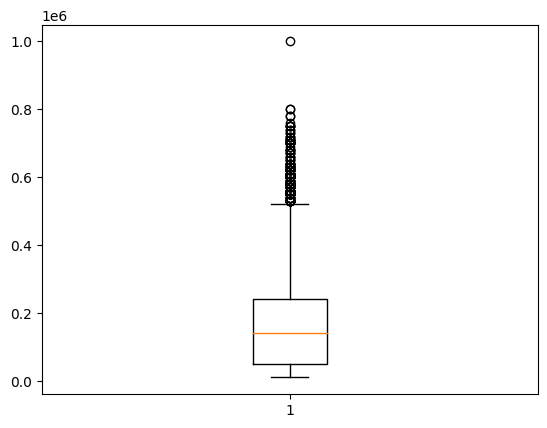

In [ ]:
plt.boxplot(credit_card['LIMIT_BAL'])

In [ ]:
Limit_percentile = credit_card['LIMIT_BAL'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]) #99% good data
Limit_percentile

0.90     360000.0
0.91     360000.0
0.92     380000.0
0.93     390000.0
0.94     410000.0
0.95     430000.0
0.96     460000.0
0.97     500000.0
0.98     500000.0
0.99     500000.0
1.00    1000000.0
Name: LIMIT_BAL, dtype: float64

In [ ]:
limit_median = credit_card['LIMIT_BAL'].median()
limit_median

140000.0

In [ ]:
limit_temp = credit_card['LIMIT_BAL'] > 500000

credit_card['new_limit'] = credit_card['LIMIT_BAL']
credit_card['new_limit'][limit_temp] = limit_median

<ipython-input-13-f591711d1120>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card['new_limit'][limit_temp] = limit_median


In [ ]:
Limit_percentile_1 = credit_card['new_limit'].quantile([0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])
Limit_percentile_1

0.50    140000.0
0.60    180000.0
0.70    210000.0
0.80    260000.0
0.90    360000.0
0.91    360000.0
0.92    360000.0
0.93    380000.0
0.94    400000.0
0.95    420000.0
0.96    440000.0
0.97    470000.0
0.98    500000.0
0.99    500000.0
1.00    500000.0
Name: new_limit, dtype: float64

In [ ]:
credit_card

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,new_limit
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20000.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,120000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,90000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,50000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,220000.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,150000.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,30000.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,80000.0


In [ ]:
# Outier Detection In Age

{'whiskers': [<matplotlib.lines.Line2D at 0x7833ff5dee00>,
 'caps': [<matplotlib.lines.Line2D at 0x7833ff5df340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7833ff5deb60>],
 'medians': [<matplotlib.lines.Line2D at 0x7833ff5df880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7833ff5dfb20>],
 'means': []}

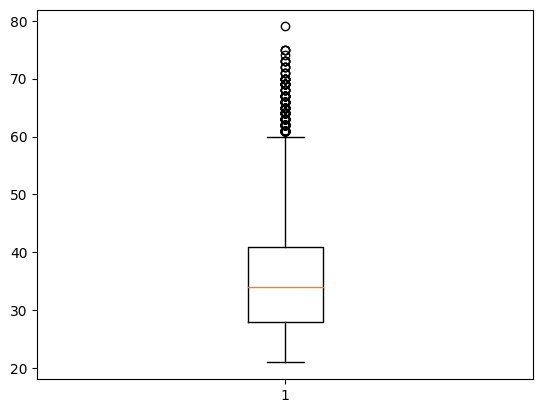

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(credit_card["AGE"])

In [ ]:
credit_card['AGE'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1]) #99% good data

0.900    49.0
0.910    49.0
0.920    50.0
0.930    51.0
0.940    52.0
0.950    53.0
0.960    54.0
0.970    55.0
0.980    57.0
0.990    60.0
0.991    61.0
0.992    61.0
0.993    62.0
0.994    62.0
0.995    63.0
0.996    64.0
0.997    65.0
0.998    67.0
0.999    69.0
1.000    79.0
Name: AGE, dtype: float64

In [ ]:
# Outlier in Pay_0

{'whiskers': [<matplotlib.lines.Line2D at 0x7833ff0983a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7833ff619b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7833ff098850>],
 'medians': [<matplotlib.lines.Line2D at 0x7833ff61bf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7833ff618fa0>],
 'means': []}

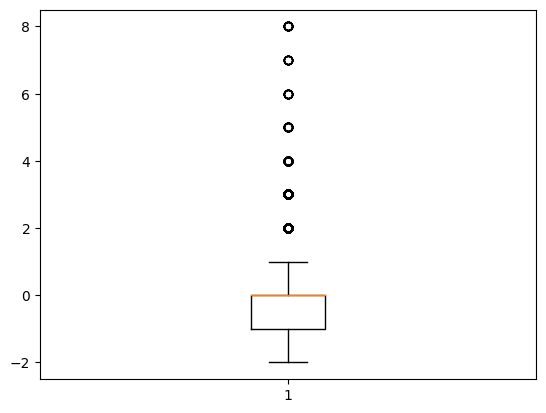

In [ ]:
plt.boxplot(credit_card['PAY_0'])

In [ ]:
credit_card['PAY_0'].quantile([0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9]) #89% good data

0.80    1.0
0.81    1.0
0.82    1.0
0.83    1.0
0.84    1.0
0.85    1.0
0.86    1.0
0.87    1.0
0.88    1.0
0.89    1.0
0.90    2.0
Name: PAY_0, dtype: float64

In [ ]:
# Outlier in Pay_2

In [ ]:
credit_card['PAY_2'].quantile([0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9]) #85% good data

0.80    0.0
0.81    0.0
0.82    0.0
0.83    0.0
0.84    0.0
0.85    0.0
0.86    2.0
0.87    2.0
0.88    2.0
0.89    2.0
0.90    2.0
Name: PAY_2, dtype: float64

In [ ]:
# Outlier in Pay_3

In [ ]:
credit_card['PAY_3'].quantile([0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9]) #85% good data

0.80    0.0
0.81    0.0
0.82    0.0
0.83    0.0
0.84    0.0
0.85    0.0
0.86    2.0
0.87    2.0
0.88    2.0
0.89    2.0
0.90    2.0
Name: PAY_3, dtype: float64

In [ ]:
# Outlier in Pay_4

In [ ]:
credit_card['PAY_4'].quantile([0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9]) #88% good data

0.80    0.0
0.81    0.0
0.82    0.0
0.83    0.0
0.84    0.0
0.85    0.0
0.86    0.0
0.87    0.0
0.88    0.0
0.89    2.0
0.90    2.0
Name: PAY_4, dtype: float64

In [ ]:
# Outlier in Pay_5

In [ ]:
credit_card['PAY_5'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]) #90% good data

0.90    0.0
0.91    2.0
0.92    2.0
0.93    2.0
0.94    2.0
0.95    2.0
0.96    2.0
0.97    2.0
0.98    2.0
0.99    3.0
1.00    8.0
Name: PAY_5, dtype: float64

In [ ]:
# Outlier in Pay_6

In [ ]:
credit_card['PAY_6'].quantile([0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9]) #89% good data

0.80    0.0
0.81    0.0
0.82    0.0
0.83    0.0
0.84    0.0
0.85    0.0
0.86    0.0
0.87    0.0
0.88    0.0
0.89    0.0
0.90    2.0
Name: PAY_6, dtype: float64

In [ ]:
# Outlier in Bill_amount 1

In [ ]:
credit_card['BILL_AMT1'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]) #99% good data

0.90    142133.70
0.91    151214.72
0.92    162127.84
0.93    173630.63
0.94    187074.56
0.95    201203.05
0.96    220592.72
0.97    245969.84
0.98    282227.68
0.99    350110.68
1.00    964511.00
Name: BILL_AMT1, dtype: float64

In [ ]:
# Outlier in Bill_amount 2

In [ ]:
credit_card['BILL_AMT2'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]) #99% good data

0.90    136905.50
0.91    145064.86
0.92    155362.72
0.93    167485.28
0.94    180578.40
0.95    194792.20
0.96    211343.08
0.97    236662.72
0.98    274120.58
0.99    337495.28
1.00    983931.00
Name: BILL_AMT2, dtype: float64

In [ ]:
# Outlier in Bill_amount 3

In [ ]:
credit_card['BILL_AMT3'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])  #99% good data

0.90     132051.30
0.91     139419.08
0.92     148633.24
0.93     160049.77
0.94     173241.34
0.95     187821.05
0.96     203652.80
0.97     228277.79
0.98     263208.54
0.99     325030.39
1.00    1664089.00
Name: BILL_AMT3, dtype: float64

In [ ]:
# Outlier in Bill_amount 4

In [ ]:
credit_card['BILL_AMT4'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])  #99% good data

0.90    122418.70
0.91    130937.09
0.92    138646.80
0.93    148287.35
0.94    160944.12
0.95    174333.35
0.96    190088.52
0.97    210965.51
0.98    246655.72
0.99    304997.27
1.00    891586.00
Name: BILL_AMT4, dtype: float64

In [ ]:
# Outlier in Bill_amount 5

In [ ]:
credit_card['BILL_AMT5'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])  #99% good data

0.90    115883.00
0.91    123655.36
0.92    132233.96
0.93    141291.49
0.94    151270.38
0.95    165794.30
0.96    181044.44
0.97    198861.03
0.98    228587.04
0.99    285868.33
1.00    927171.00
Name: BILL_AMT5, dtype: float64

In [ ]:
# Outlier in Bill_amount 6

In [ ]:
credit_card['BILL_AMT6'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])  #99% good data

0.90    112110.40
0.91    120740.53
0.92    129224.48
0.93    137836.47
0.94    148093.84
0.95    161912.00
0.96    177592.76
0.97    195114.30
0.98    223436.14
0.99    279505.06
1.00    961664.00
Name: BILL_AMT6, dtype: float64

In [ ]:
# Outlier in Pay_amount 1

In [ ]:
credit_card['PAY_AMT1'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])  #99% good data

0.90     10300.00
0.91     11174.00
0.92     12500.00
0.93     14127.07
0.94     15510.66
0.95     18428.20
0.96     21006.24
0.97     28232.78
0.98     40000.00
0.99     66522.18
1.00    873552.00
Name: PAY_AMT1, dtype: float64

In [ ]:
credit_card['PAY_AMT2'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])  #99% good data

0.90      10401.10
0.91      11320.00
0.92      12536.16
0.93      14131.26
0.94      16000.00
0.95      19004.35
0.96      21408.36
0.97      29000.00
0.98      41027.88
0.99      76651.02
1.00    1684259.00
Name: PAY_AMT2, dtype: float64

In [ ]:
credit_card['PAY_AMT3'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])  #99% good data

0.90     10000.00
0.91     10288.36
0.92     11558.48
0.93     13000.00
0.94     15000.00
0.95     17589.40
0.96     20150.00
0.97     27000.33
0.98     38661.36
0.99     70000.00
1.00    896040.00
Name: PAY_AMT3, dtype: float64

In [ ]:
credit_card['PAY_AMT4'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])  #99% good data

0.90      9570.60
0.91     10000.00
0.92     10404.72
0.93     11985.21
0.94     13949.60
0.95     16014.95
0.96     20000.00
0.97     26665.40
0.98     39634.04
0.99     67054.44
1.00    621000.00
Name: PAY_AMT4, dtype: float64

In [ ]:
credit_card['PAY_AMT5'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])  #99% good data

0.90      9500.00
0.91     10000.00
0.92     10358.16
0.93     11964.14
0.94     13939.06
0.95     16000.00
0.96     20000.00
0.97     25314.21
0.98     37259.66
0.99     65607.56
1.00    426529.00
Name: PAY_AMT5, dtype: float64

In [ ]:
credit_card['PAY_AMT6'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])  #99% good data

0.90      9600.00
0.91     10000.00
0.92     10500.00
0.93     12017.14
0.94     14442.86
0.95     17343.80
0.96     21034.88
0.97     29561.76
0.98     45010.48
0.99     82619.05
1.00    528666.00
Name: PAY_AMT6, dtype: float64